<a href="https://colab.research.google.com/github/farhanraza200001/Boston-house-price-production-Analysis-Regression-/blob/main/Assignment_of_linear_reg_on_house_boston_dataset_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

## **IMPORT MODULES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# ***LOADING THE DATASET***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/ML Assignments data/Copy of housing.csv')

In [4]:
dataset.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


# We have all the values in form of list of string which we need to convert to float to make a new dataset.

In [5]:
list_of_strings = dataset.iloc[:,0]

In [6]:
def map_(k):
  s=[]
  for i in k:
    n=float(i)
    s.append(n)
  return (s)  

In [7]:
a=[]
for i in range(len(list_of_strings)):
  a.append(map_(list_of_strings[i].split()))
print(a)  

[[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6], [0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7], [0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4], [0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2], [0.02985, 0.0, 2.18, 0.0, 0.458, 6.43, 58.7, 6.0622, 3.0, 222.0, 18.7, 394.12, 5.21, 28.7], [0.08829, 12.5, 7.87, 0.0, 0.524, 6.012, 66.6, 5.5605, 5.0, 311.0, 15.2, 395.6, 12.43, 22.9], [0.14455, 12.5, 7.87, 0.0, 0.524, 6.172, 96.1, 5.9505, 5.0, 311.0, 15.2, 396.9, 19.15, 27.1], [0.21124, 12.5, 7.87, 0.0, 0.524, 5.631, 100.0, 6.0821, 5.0, 311.0, 15.2, 386.63, 29.93, 16.5], [0.17004, 12.5, 7.87, 0.0, 0.524, 6.004, 85.9, 6.5921, 5.0, 311.0, 15.2, 386.71, 17.1, 18.9], [0.22489, 12.5, 7.87, 0.0, 0.524, 6.377, 94.3, 6.3467, 5.0, 311.0, 15.2, 392.52, 20.45, 15.0], [0.11747, 12.5, 7.87, 0.0, 0.524, 6.009, 82.9, 6.2267, 5.0, 311.

In [8]:
new_df = pd.DataFrame(data=a, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','BLACK','LSTATE','MEDV'])

In [9]:
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTATE,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
new_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTATE,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


## **Stastistical info**

In [11]:
new_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTATE,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## **Data type**

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    float64
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  BLACK    505 non-null    float64
 12  LSTATE   505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


## **Preprocessing the dataset**

In [13]:
#check for null values

In [14]:
new_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTATE     0
MEDV       0
dtype: int64

## Wao its great,there is no null values

## **# Exploratory Data Analysis**

In [15]:
#Create Box plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

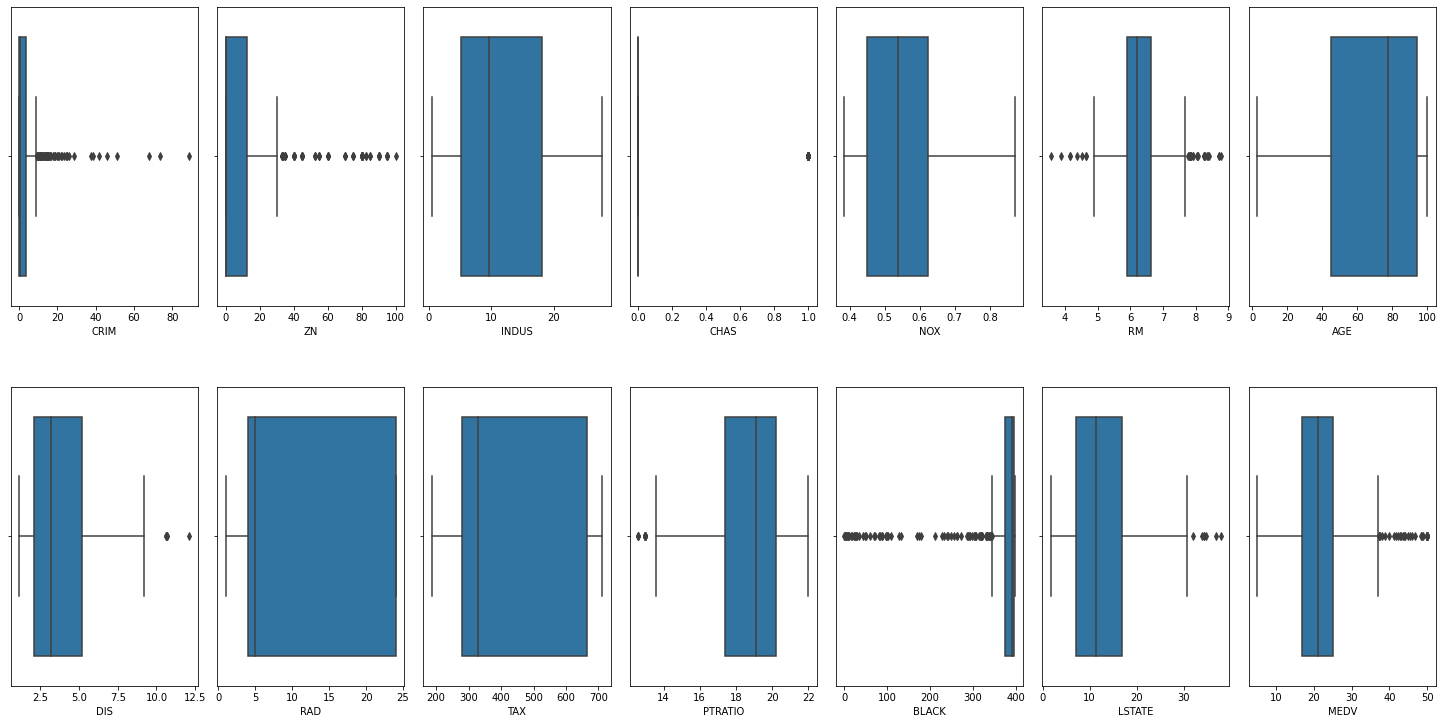

In [16]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax = ax.flatten()
for col, value in new_df.items():
  sns.boxplot(value, ax=ax[index])
  index+=1
  plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

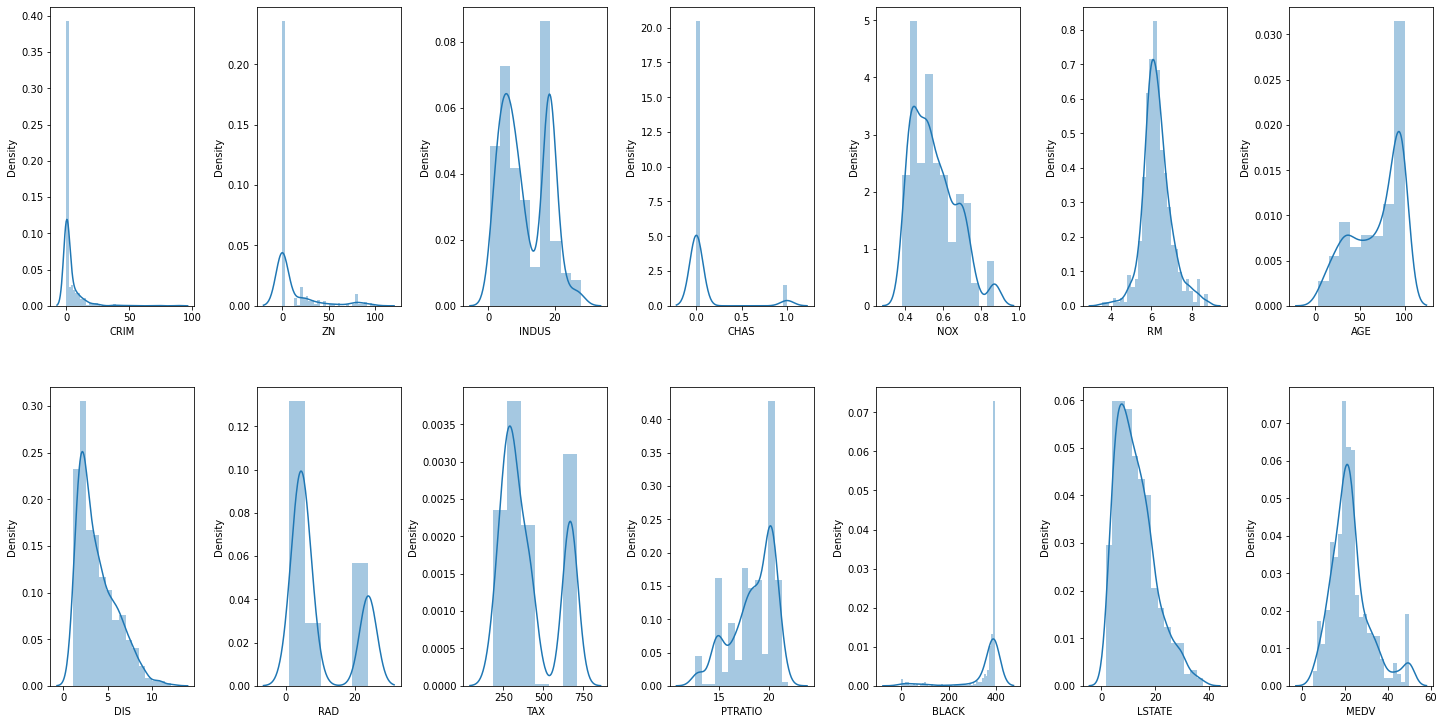

In [17]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax = ax.flatten()
for col, value in new_df.items():
  sns.distplot(value, ax=ax[index])
  index+=1
  plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

From the above graph we observe that some columns have very big range...its better to kept range in between 0 to 1.Use log transformation or MIN-MAX Normalisation in order to get the range in between 0-1.

In [18]:
#MIN-MAX Normalisation

In [19]:
cols = ['CRIM','ZN','AGE','BLACK','TAX']
for col in cols:
  #find min and max of given columns
  minimum = min(new_df[col])
  maximum = max(new_df[col])
  new_df[col] = (new_df[col]-minimum)/(maximum-minimum)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

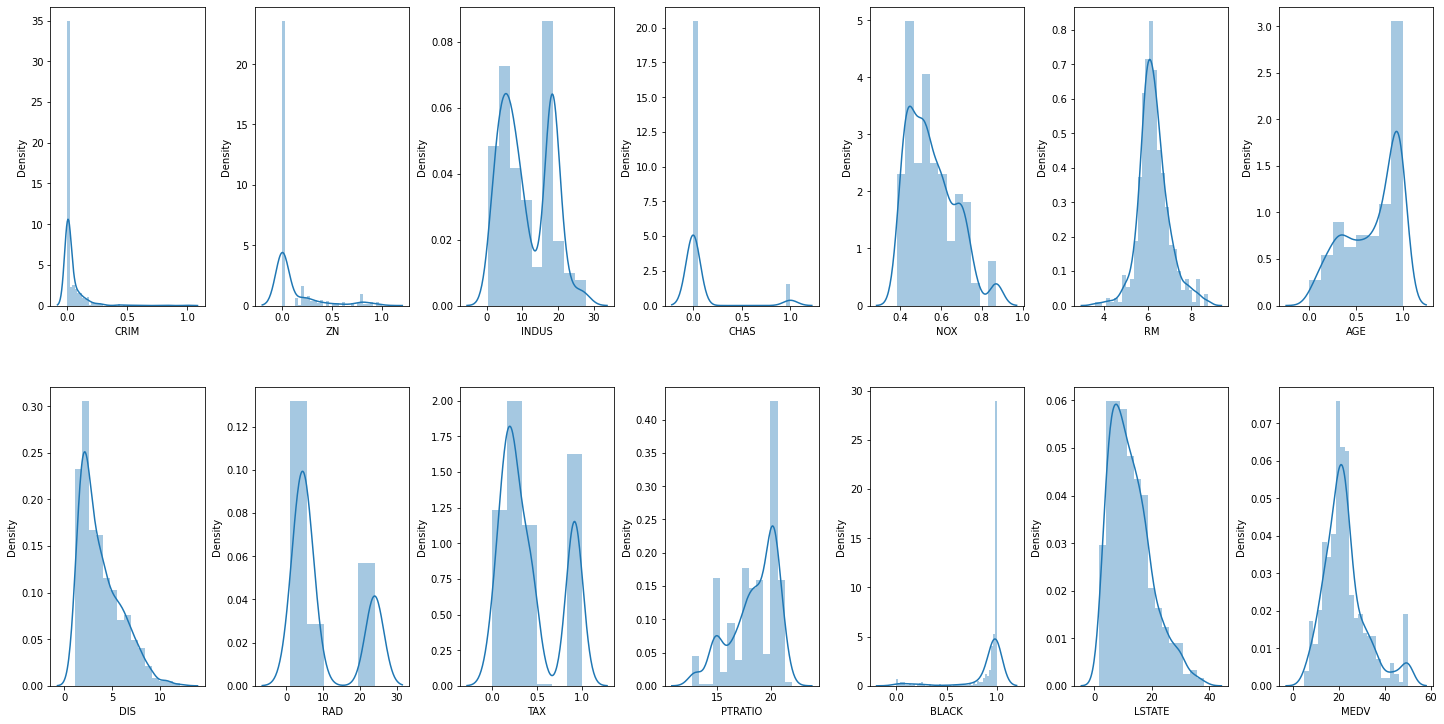

In [20]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax = ax.flatten()
for col, value in new_df.items():
  sns.distplot(value, ax=ax[index])
  index+=1
  plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

From the above distplot we clearly observe that the range of columns are in between the range of 0-1

From the above distplot we observe that the distribution of some column are not uniform.
We need to have uniform distribution so we go for standardization.


In [21]:
#Standardization

In [22]:
from sklearn import preprocessing

In [23]:
scalar = preprocessing.StandardScaler()

In [24]:
#fit our data

In [25]:
Scaled_cols = scalar.fit_transform(new_df[cols]) #This gives a matrix type data,no column names is here so we make dataframe

In [26]:
Scaled_cols = pd.DataFrame(Scaled_cols,columns=cols)

In [27]:
Scaled_cols.head()

,CRIM,ZN,AGE,BLACK,TAX
0,-0.417830,-0.486716,0.366571,0.441573,-0.988107
1,-0.417832,-0.486716,-0.265790,0.396984,-0.988107
2,-0.417242,-0.486716,-0.809337,0.416704,-1.106827
3,-0.412977,-0.486716,-0.510919,0.441573,-1.106827
4,-0.417535,-0.486716,-0.351052,0.411117,-1.106827


Here we got standard values

In [28]:
#now assign this value to original dataset

In [29]:
for col in cols:
  new_df[col]=Scaled_cols[col]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

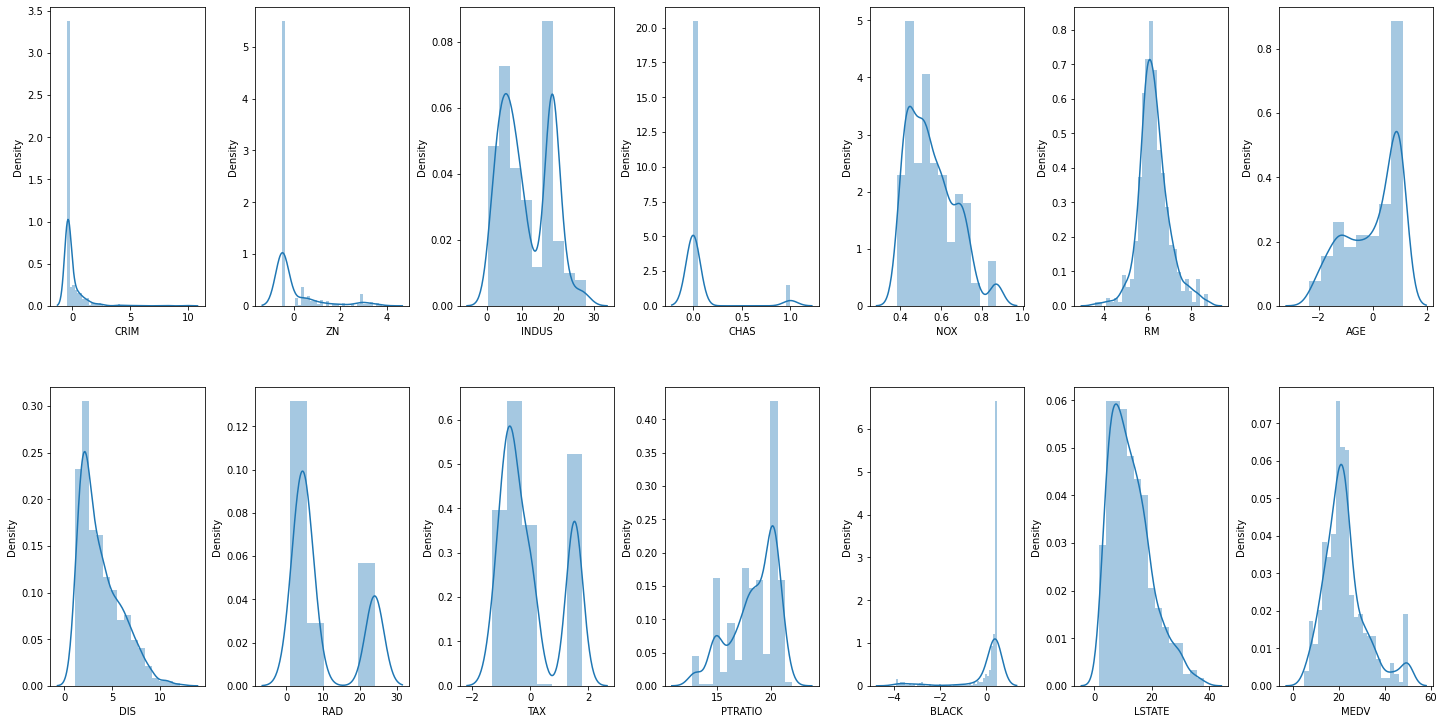

In [30]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax = ax.flatten()
for col, value in new_df.items():
  sns.distplot(value, ax=ax[index])
  index+=1
  plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

As we can see that there is a not much of uniformation distributin observed after standardization also,bt it will improve the model slightly above that.

# Now we are going to check the correlation between independent and dependent variable.
# Apart from that we also check the correlation between the independents variable.

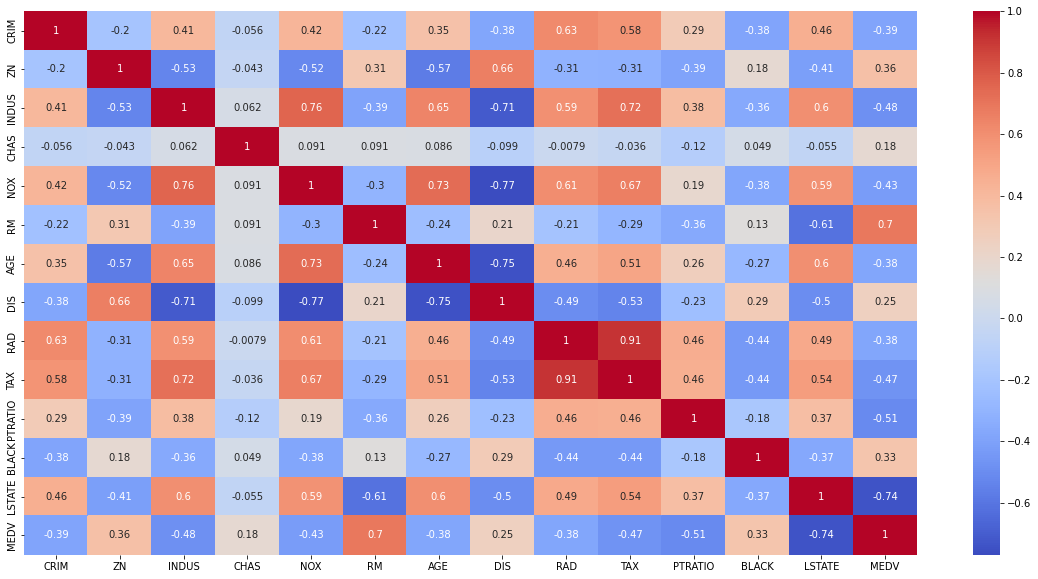

In [31]:
corr = new_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True,cmap='coolwarm')

As we see LSTATE is highly correlated to MEDV(target value).
where as RM is positively highly correlated.
APART from target value we see in general attributes,RAD is highly correlated to TAX.WE need to ignore any one of the for better training model,we will just ignore RAD

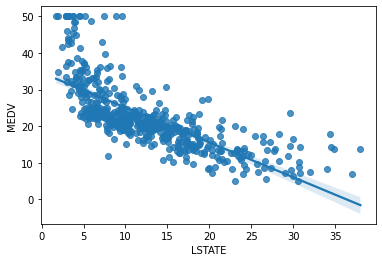

In [33]:
sns.regplot(y=new_df['MEDV'],x=new_df['LSTATE'])

HERE PRICE DECREASES WHEN LSTATE INCREASES

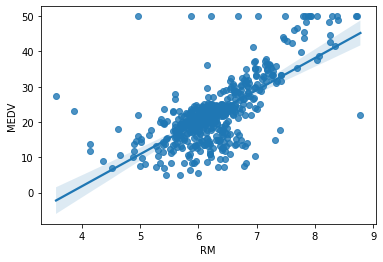

In [35]:
sns.regplot(y=new_df['MEDV'],x=new_df['RM'])

HERE we can cleary see that price of house increases when RM increases

## **LET'S CREATE VARIABLE**

In [36]:
#DEPENDENT VARIABLE
dependent_variable = 'MEDV'

In [38]:
#LIST OF INDEPENDENT VARIABLES
independent_variables = list(set(new_df.columns.tolist())-{dependent_variable})

In [39]:
#creating the data of independent variables
x=new_df[independent_variables].values

In [41]:
#creating the dependent variable data
y=new_df[dependent_variable].values

In [43]:
#Splitting the data set into training set and testing  set
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)


In [44]:
x_train[0:5]

array([[-0.48671582, -0.54644496,  1.52876698,  3.1523    , 20.2       ,
         0.3464786 , 24.        , 11.45      ,  0.        ,  0.14127875,
         0.583     ,  5.905     , 18.1       ],
       [ 0.3708958 , -0.05618724, -0.85751441,  2.4216    , 13.        ,
         0.30616188,  5.        ,  7.44      ,  0.        , -0.35375708,
         0.575     ,  8.297     ,  3.97      ],
       [-0.48671582, -1.83248335, -0.6022654 ,  3.3751    , 17.4       ,
         0.22914381,  8.        ,  3.92      ,  0.        , -0.38633249,
         0.504     ,  7.686     ,  6.2       ],
       [-0.48671582,  0.72538305,  1.52876698,  1.9047    , 20.2       ,
        -0.03894043, 24.        , 14.64      ,  1.        ,  0.06996748,
         0.77      ,  5.803     , 18.1       ],
       [-0.48671582, -0.24092203, -0.6022654 ,  4.7075    , 21.        ,
         0.44157346,  4.        ,  8.26      ,  0.        , -0.34777804,
         0.538     ,  5.949     ,  8.14      ]])

In [45]:
#fitting multiple linear regression to the training set
lr = LinearRegression()

In [46]:
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
#y intercept
lr.intercept_

25.516593887626584

In [49]:
#coefficient of eqn
lr.coef_

array([  1.1323116 ,  -0.19977652,  -2.23285543,  -1.40185226,
        -0.95312706,   0.79232546,   0.25887749,  -0.36707355,
         2.43960064,  -0.94048402, -18.21291651,   4.99487815,
         0.04302976])

In [50]:
y_pred_train = lr.predict(x_train)

In [54]:
y_train[0:5]

array([20.6, 50. , 46.7, 16.8, 20.4])

In [55]:
y_pred_train[0:5]

array([19.7960904 , 42.35666504, 36.01563191, 18.40599276, 18.69016962])

In [63]:
y_pred = lr.predict(x_test)

In [65]:
mean_squared_error(y_test,y_pred)

35.23443030948921

In [66]:
r2_score(y_test, y_pred)

0.5359733832170898